<h1>Whose Voice is Soothing?</h1>

We know that all the four Beatles members were singers. But they sang both alone and together in different songs. So, here I analyze vocals data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# this allows plots to appear directly in the notebook
%matplotlib inline

# load data
df = pd.read_json('data.json')

# configure graphics 
plt.style.use('ggplot')
plt.figure()
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')

<Figure size 432x288 with 0 Axes>

First, let's see the general distribution of vocals data. But first, let's look at the data labels. 

In [2]:
dv = pd.DataFrame({'vocals': df['vocals']})
dvc = dv.apply(pd.value_counts)
dvc

,vocals
Lennon,63
McCartney,54
Harrison,25
McCartney\n(with Lennon),14
Lennon\n(with McCartney),13
Lennon\nMcCartney,11
Starr,10
Lennon\n(with McCartney and Harrison),4
Lennon and McCartney,2
McCartney\nLennon\nHarrison\nStarr,1


We see that there are duplicate labels. So we should merge some columns into one; for example, such as **Lennon\nMcCartney**, **Lennon and McCartney**, and **McCartney and Lennon**.

In [3]:
def merge_vocals(song):
    '''
        Merge equvalent vocals data
    '''
   
    if song in ('Lennon\nMcCartney', 'Lennon and McCartney)', 'McCartney and Lennon'):
        song = 'Lennon and McCartney'
    elif song in ('Lennon\n(with McCartney)', 'Lennon, with McCartney'):
        song = 'Lennon with McCartney'
    elif song == 'Lennon\nMcCartney\nHarrison':
        song = 'Lennon, McCartney and Harrison'
    elif song in ('Harrison\n(with Lennon and McCartney)', 'Harrison\n(with Lennon\nMcCartney)'):
        song = 'Harrison\n(with Lennon and McCartney)'
    elif song == 'McCartney\n(with Lennon, Harrison, and Starr':
        song = 'McCartney\n(with Lennon, Harrison and Starr'

    return song

In [4]:
df['merged_vocals'] = df['vocals'].apply(merge_vocals)
dv = pd.DataFrame({'vocals': df['merged_vocals']})
dvc = dv.apply(pd.value_counts)
dvc

,vocals
Lennon,63
McCartney,54
Harrison,25
Lennon and McCartney,15
McCartney\n(with Lennon),14
Lennon with McCartney,14
Starr,10
Lennon\n(with McCartney and Harrison),4
"Lennon, McCartney and Harrison",2
Harrison\n(with Lennon and McCartney),2


That looks better. The time has come to make a picture! For better presentation let's leave out the combinations of vocals which appear only once.

In [9]:
dvc = dvc[dvc['vocals'] > 1]

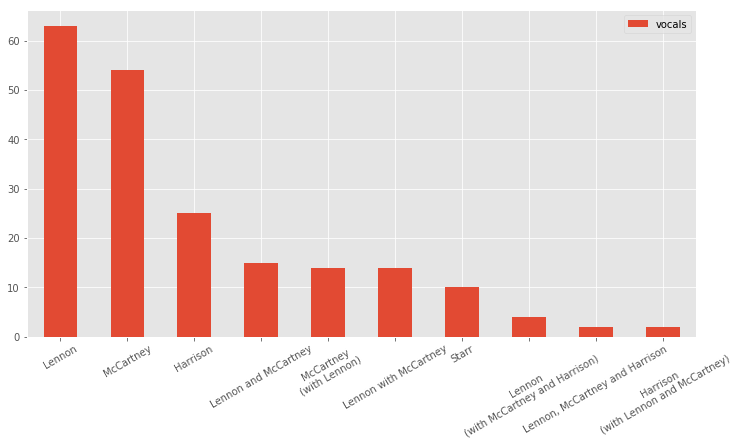

In [10]:
# number of songs performed by each singer or their combination
dvc.plot(figsize=(12, 6), kind='bar', rot=30)

The same, in percents.

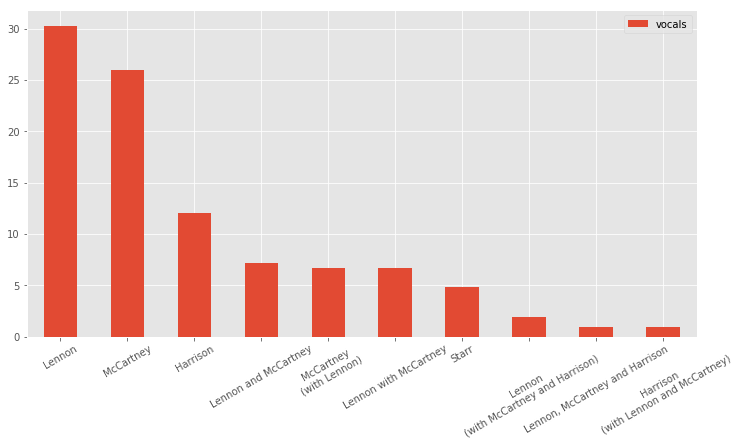

In [11]:
# percent of songs performed by each singer or their combination
all_songs_number = len(df)
dvp = dvc / (all_songs_number) * 100
dvp.plot(figsize=(12, 6), kind='bar', rot=30)

So, we see that Lennon is definitely the leader; his voice alone can be heard in more than a third of all the songs. Let's see the distinction between songs sung alone and songs sung by two or more people, in general.

In [14]:
df_together = df[df['merged_vocals'].str.contains(',')|df['merged_vocals'].str.contains('and')|
                 df['merged_vocals'].str.contains('with')|df['merged_vocals'].str.contains('\n')]
df_together.vocals.count()/all_songs_number

0.26923076923076922

Only about one fourth of the songs are sung together! Let's see the distribution of songs with one lead vocals.

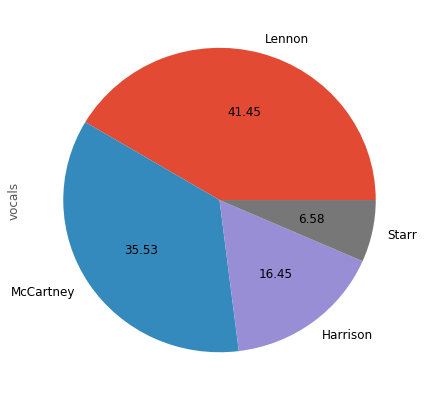

In [16]:
df_alone = df[~(df['merged_vocals'].str.contains(',')|df['merged_vocals'].str.contains('and')|
                df['merged_vocals'].str.contains('with')|df['merged_vocals'].str.contains('\n'))]
dv_alone = pd.DataFrame({'vocals': df_alone['merged_vocals']})
dvc_alone = dv_alone.apply(pd.value_counts)
dvc_alone.vocals.plot.pie(figsize=(7, 7), autopct='%.2f', fontsize=12)

It's clear that Lennon's leadership is not absolute. McCartney's share is big, too. 

Let's see the ratioo of songs with solo vocals to the total amount of songs with this singer, in percent.

In [17]:
# songs with solo Lennon vocals / all songs with Lennon on vocals
df[df.vocals == 'Lennon'].vocals.count() / df[df.vocals.str.contains('Lennon')].vocals.count() * 100

52.941176470588239

In [18]:
# songs with solo McCartney vocals / all songs with McCartney on vocals
df[df.vocals == 'McCartney'].vocals.count() /  df[df.vocals.str.contains('McCartney')].vocals.count() * 100

49.541284403669728

In [19]:
# songs with solo Harrison vocals / all songs with Harrison on vocals
df[df.vocals == 'Harrison'].vocals.count() / df[df.vocals.str.contains('Harrison')].vocals.count() * 100

67.567567567567565

In [20]:
# songs with solo Starr vocals /  all songs with Starr on vocals
df[df.vocals == 'Starr'].vocals.count() / df[df.vocals.str.contains('Starr')].vocals.count() * 100

71.428571428571431

So, we can see that songs which McCartney participated in, almost for 50% were not the songs he was the only singer. Lennon was a bit less cooperative, and Starr has the highest share of one-singer-songs!

But actually, if we choose a Beatles song randomly, what is the probability to hear Lennon and McCartney together?

In [25]:
# probability to hear Lennon and McCartney 
df[df.vocals.str.contains('Lennon')&df.vocals.str.contains('McCartney')].vocals.count() / all_songs_number * 100

26.442307692307693

The probability to hear Lennon AND McCartney together is only 26%! Well, what about hearing one OR another?

In [26]:
# probability to hear Lennon or McCartney
df[df.vocals.str.contains('Lennon')|df.vocals.str.contains('McCartney')].vocals.count() / all_songs_number * 100

83.173076923076934

83% for one of them - that's better!

Let's see how the share of one-singer-songs changes from year to year.

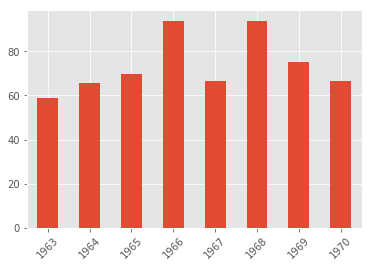

In [41]:
# show one-singer songs share by years
df_sorted = df.sort_values('year')
gr = df_alone.groupby('year', sort=False)

lead_vocals_list = []

for key in gr.groups.keys():
    year = gr.get_group(key)['year'].values[0]
 
    # sum of songs with one lead vocals by years
    songs_with_one_singer = gr.get_group(key)['merged_vocals'].value_counts().sum()
    
    # number of all songs in a year
    all_songs_for_year = df[df['year']==gr.get_group(key)['year'].values[0]]['merged_vocals'].count()
    
    lead_vocals = (songs_with_one_singer / all_songs_for_year)  * 100
    lead_vocals_list.append({'year': year, 'lead_vocals': lead_vocals})

lead_vocals_df = pd.DataFrame(index=[k['year'] for k in lead_vocals_list], 
                              data={'lead_vocals': [k['lead_vocals'] for k in lead_vocals_list]})
lead_vocals_df.sort_index().lead_vocals.plot(kind='bar', rot=45)

It's interesting to see that more than 80% of the songs in 1966 and 1968 are sung by one singer! And the minimal value, a bit less than 60% of one-singer-songs we can see in 1963.

Let's see who sings cover versions most.

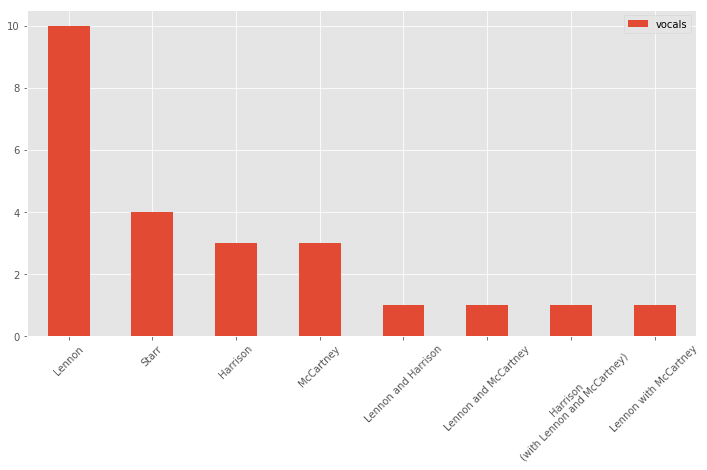

In [43]:
dfc = df[df.cover==True]
dv_c = pd.DataFrame({'vocals': dfc['merged_vocals']})
dvc_c = dv_c.apply(pd.value_counts)
dvc_c.plot(figsize=(12, 6), kind='bar', rot=45)

Lennon sings most of the covers! And we can see that most covers are one-singer-songs!

Let's see now how share of songs a singer participated in, changes with time, for all the singers.

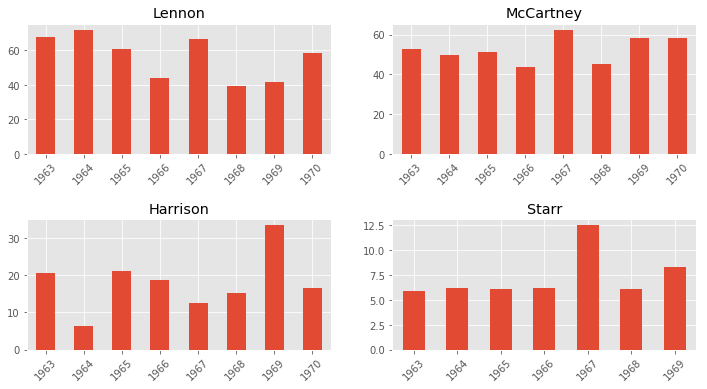

In [51]:
fig, axs = plt.subplots(figsize=(12, 6), nrows=2, ncols=2)
fig.subplots_adjust(hspace=.5)
vocals_singers_std = {}

for ax, singer in zip(axs.flatten(), ('Lennon', 'McCartney', 'Harrison', 'Starr')):

    gr = df[df['merged_vocals'].str.contains(singer)].groupby('year')
    vocals_list = []

    for key in gr.groups.keys():
        year = gr.get_group(key)['year'].values[0]
        
        songs_with_one_singer = gr.get_group(key)['merged_vocals'].value_counts().sum() 
        
        all_songs_for_year = df[df.year==gr.get_group(key)['year'].values[0]]['merged_vocals'].count()
    
        vocals = (songs_with_one_singer / all_songs_for_year) * 100
        vocals_list.append({'year': year, 'vocals': vocals})

    vocals_df = pd.DataFrame(index=[k['year'] for k in vocals_list], data={'vocals': [k['vocals'] for k in vocals_list]})
    vocals_df.sort_index().vocals.plot(kind='bar', ax=ax, title=singer, rot=45)
    vocals_singers_std[singer] = vocals_df['vocals'].std()
    

It's evident that the figures are higher for the two lead singers, Lennon and McCartney. But there are no distinctive patterns. Lennon has his maximum degree of participation as a singer in 1964 (at about 66%), McCartney in 1967 (more than 60%), Harrison in 1969 (more than 30%), and Starr in 1967 (12.5%). But what about variance?

In [52]:
print(vocals_singers_std)

{'Starr': 2.4285344816339625, 'Lennon': 12.866934266885634, 'McCartney': 6.5538611917150256, 'Harrison': 7.8455530255828601}


We see that Starr has the lowest variance and Lennon the highest.

<h3>CONCLUSION</h3>

Lennon is definitely the lead singer: he sang about a third of all songs alone, and participated as a singer in about 57%. McCartney holds the second place with a fourth of all songs and about 52%, respectively.

About three forth of all the songs were sung by one singer alone, with Lennon having 41% and McCartney 35%.

But McCartney is the leader in command work: of the songs he participated in, almost 50% were not the songs he was the only vocalist. Lennon was a bit less colloborative, while Starr has the highest share of one-singer-songs (71%).

The share of songs sung by one member is never less than 60% (1963, the very first year), and rises to the maximum of more than 80% in 1966 and 1968.

The probability to hear Lennon and McCartney together while listening to a random Beatles song is only 22%, but hearing either one or another is much more likely (83%).

As for cover songs, most of them are one-singer-songs, and most of them are sung by Lennon.

As for change of participation in vocals with time, this data doesn't seem to be very interesting. Lennon has his maximum degree of participation as a vocalist in 1964 (at about 66%), McCartney in 1967 (62%), Harrison in 1969 (33%), Starr in 1968 (12.5%). Starr has the lowest variance in his share and Lennon the highest.